# Python データビジュアライゼーション入門

## Ch.05 さまざまなグラフ・チャートによるビジュアライゼーション

- Sec.15 ヒートマップ
- Sec.16 ウォーターフォールチャート
- Sec.17 ツリーマップ
- Sec.18 サンバーストチャート
- Sec.19 レーダーチャート

In [28]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline
import plotly.subplots
import seaborn as sns
import squarify
from IPython.display import display
from matplotlib import rcParams

rcParams["font.family"] = "IPAexgothic"

### Sec.15 ヒートマップ

- 値の大小で色を変化させる
- [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

list5.68 カフェの商品の月別の販売量

In [29]:
# データ読み込みとデータ定義
cafe = pd.read_csv("../support/cafe.csv", header=0, index_col=0)
display(cafe)

,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月
商品,,,,,,,,,,,,
ホットコーヒー,980,828,823,650,732,653,763,650,791,732,758,996
アイスコーヒー,314,269,419,596,669,672,840,944,903,555,865,318
ホットティー,670,678,500,418,469,471,320,380,420,390,606,558
アイスティー,280,320,430,450,550,580,628,734,494,304,473,280
クッキー,311,332,200,403,350,369,219,328,316,379,434,366
アイスクリーム,150,128,200,284,319,320,650,559,500,265,412,152
プレーンドーナツ,205,278,249,424,372,371,426,269,200,297,427,311
チョコドーナツ,242,296,387,358,335,407,447,449,163,229,354,301
サンドイッチ,124,174,147,184,160,187,149,195,145,156,126,200


list5.69 ヒートマップの描画例1

<AxesSubplot: ylabel='商品'>

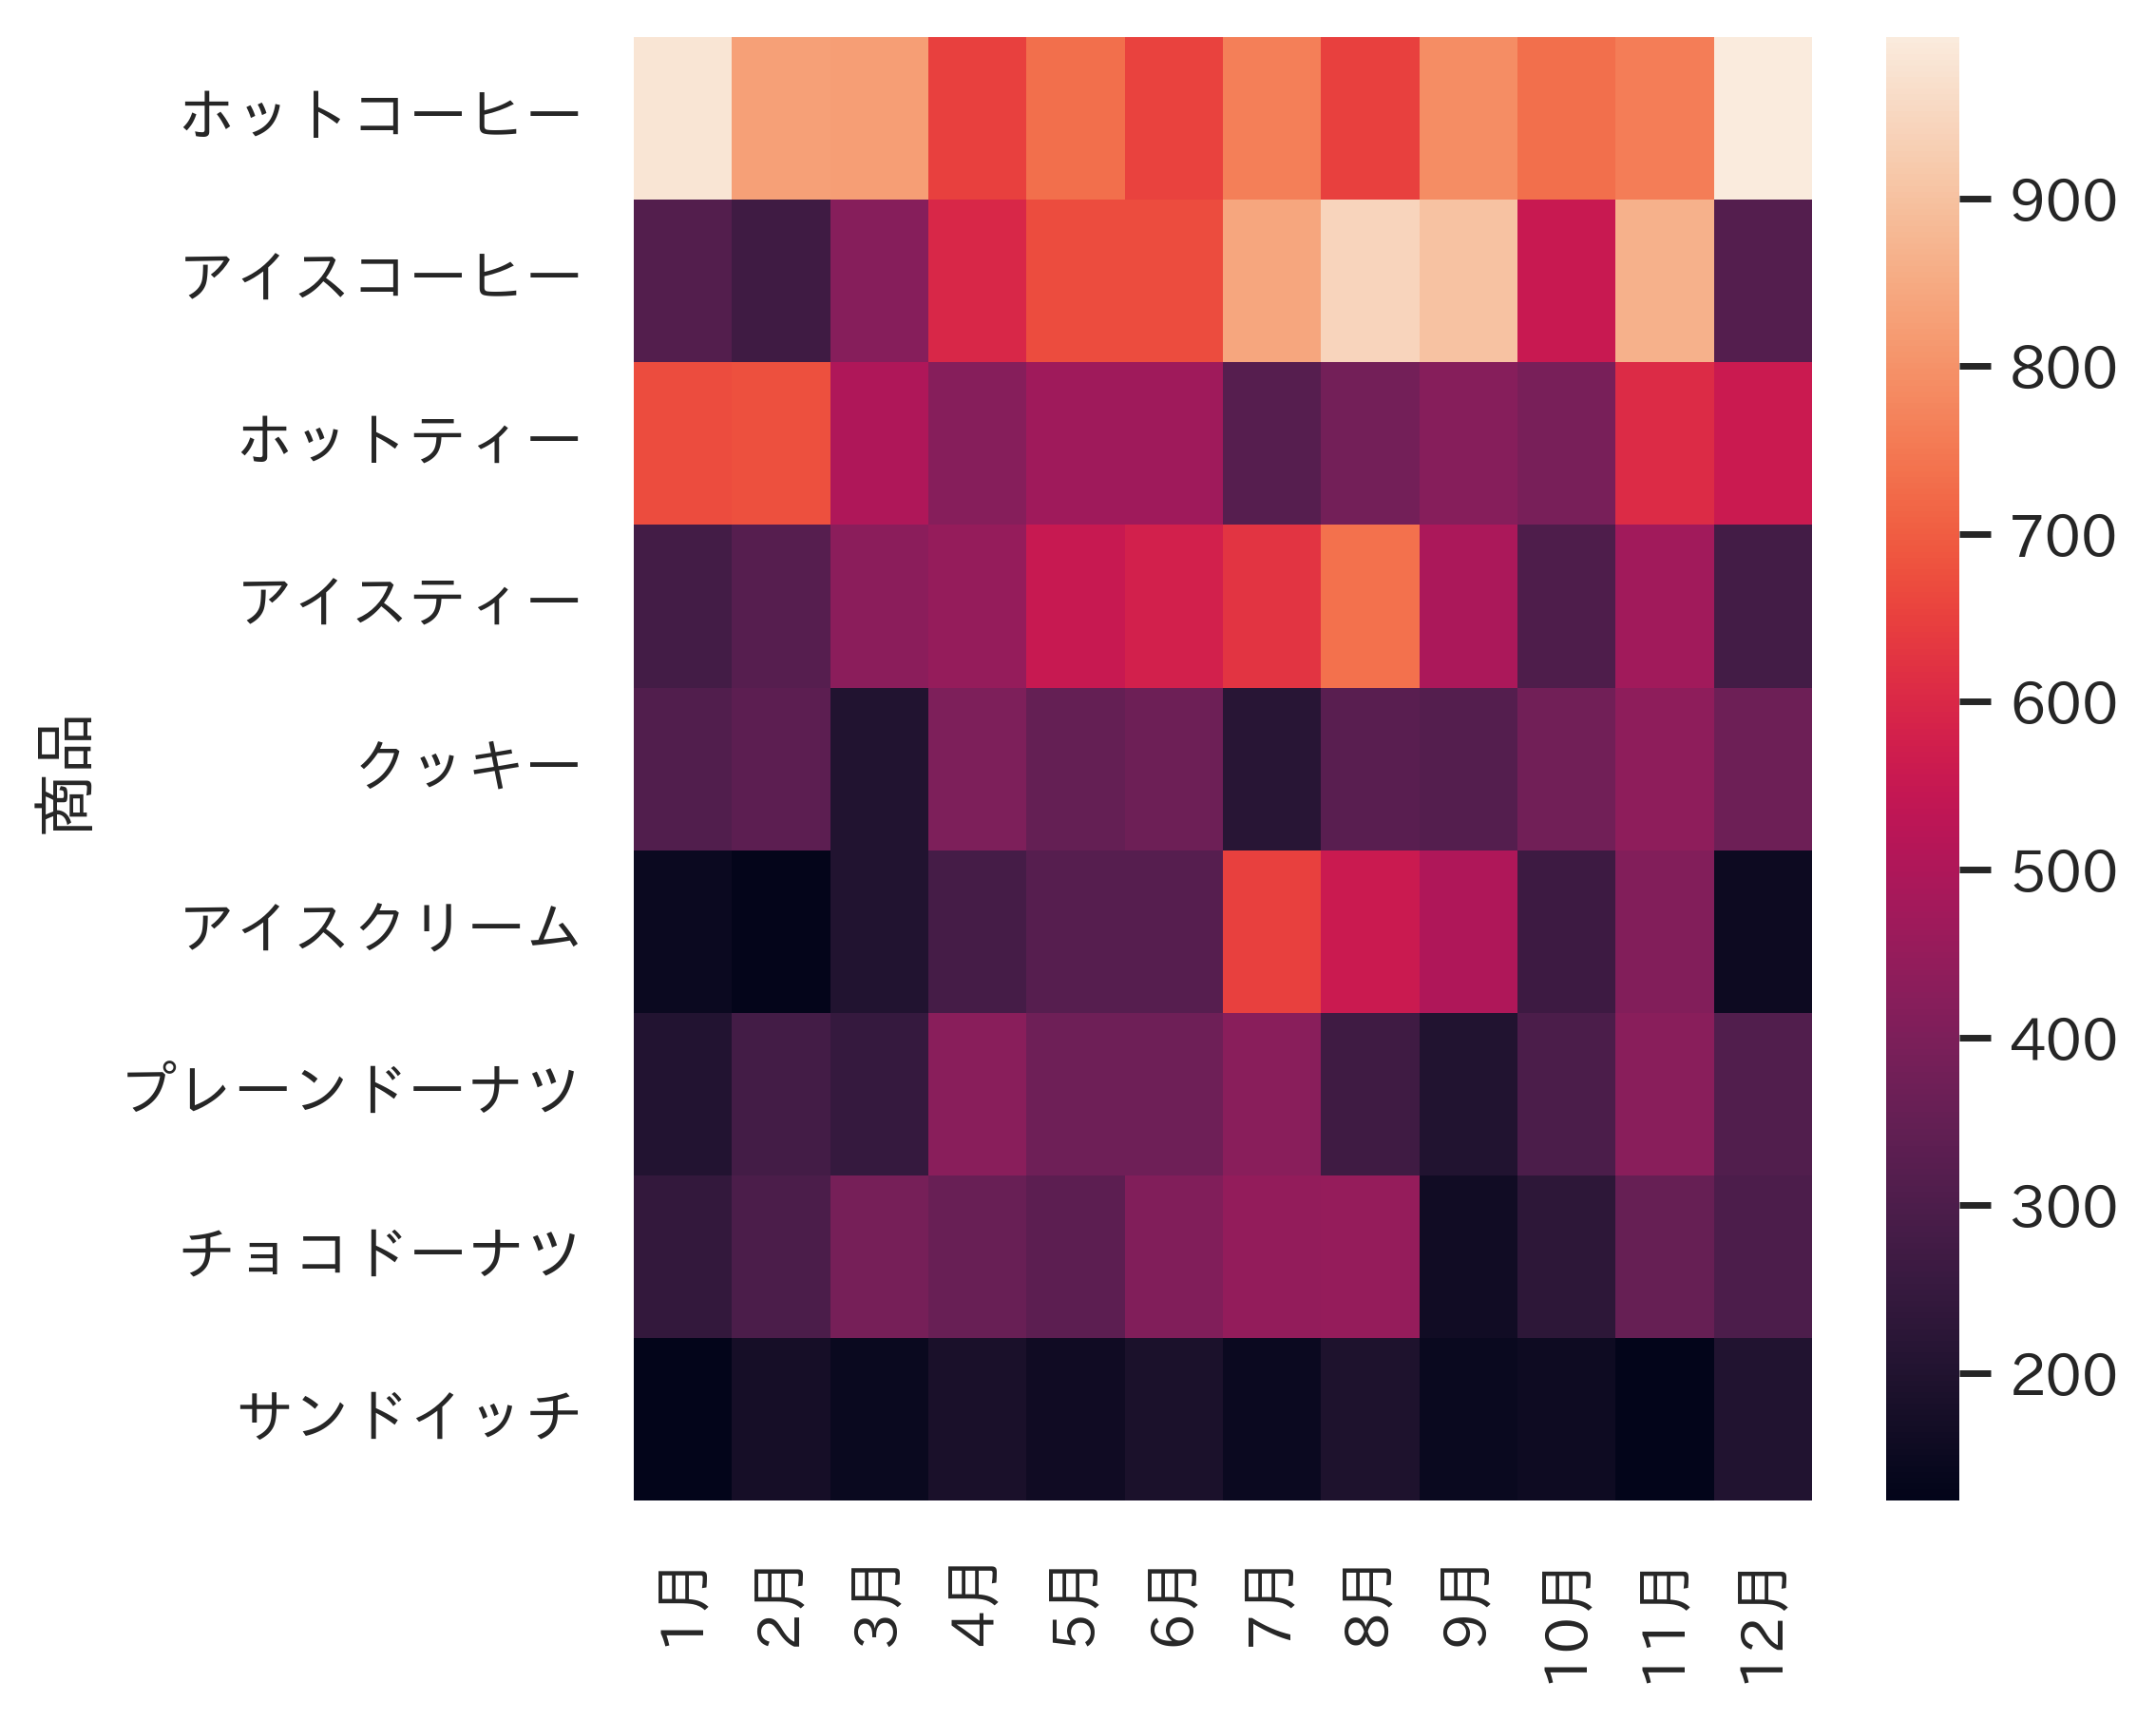

In [30]:
sns.heatmap(cafe)

list5.70 ヒートマップの描画例2

<AxesSubplot: ylabel='商品'>

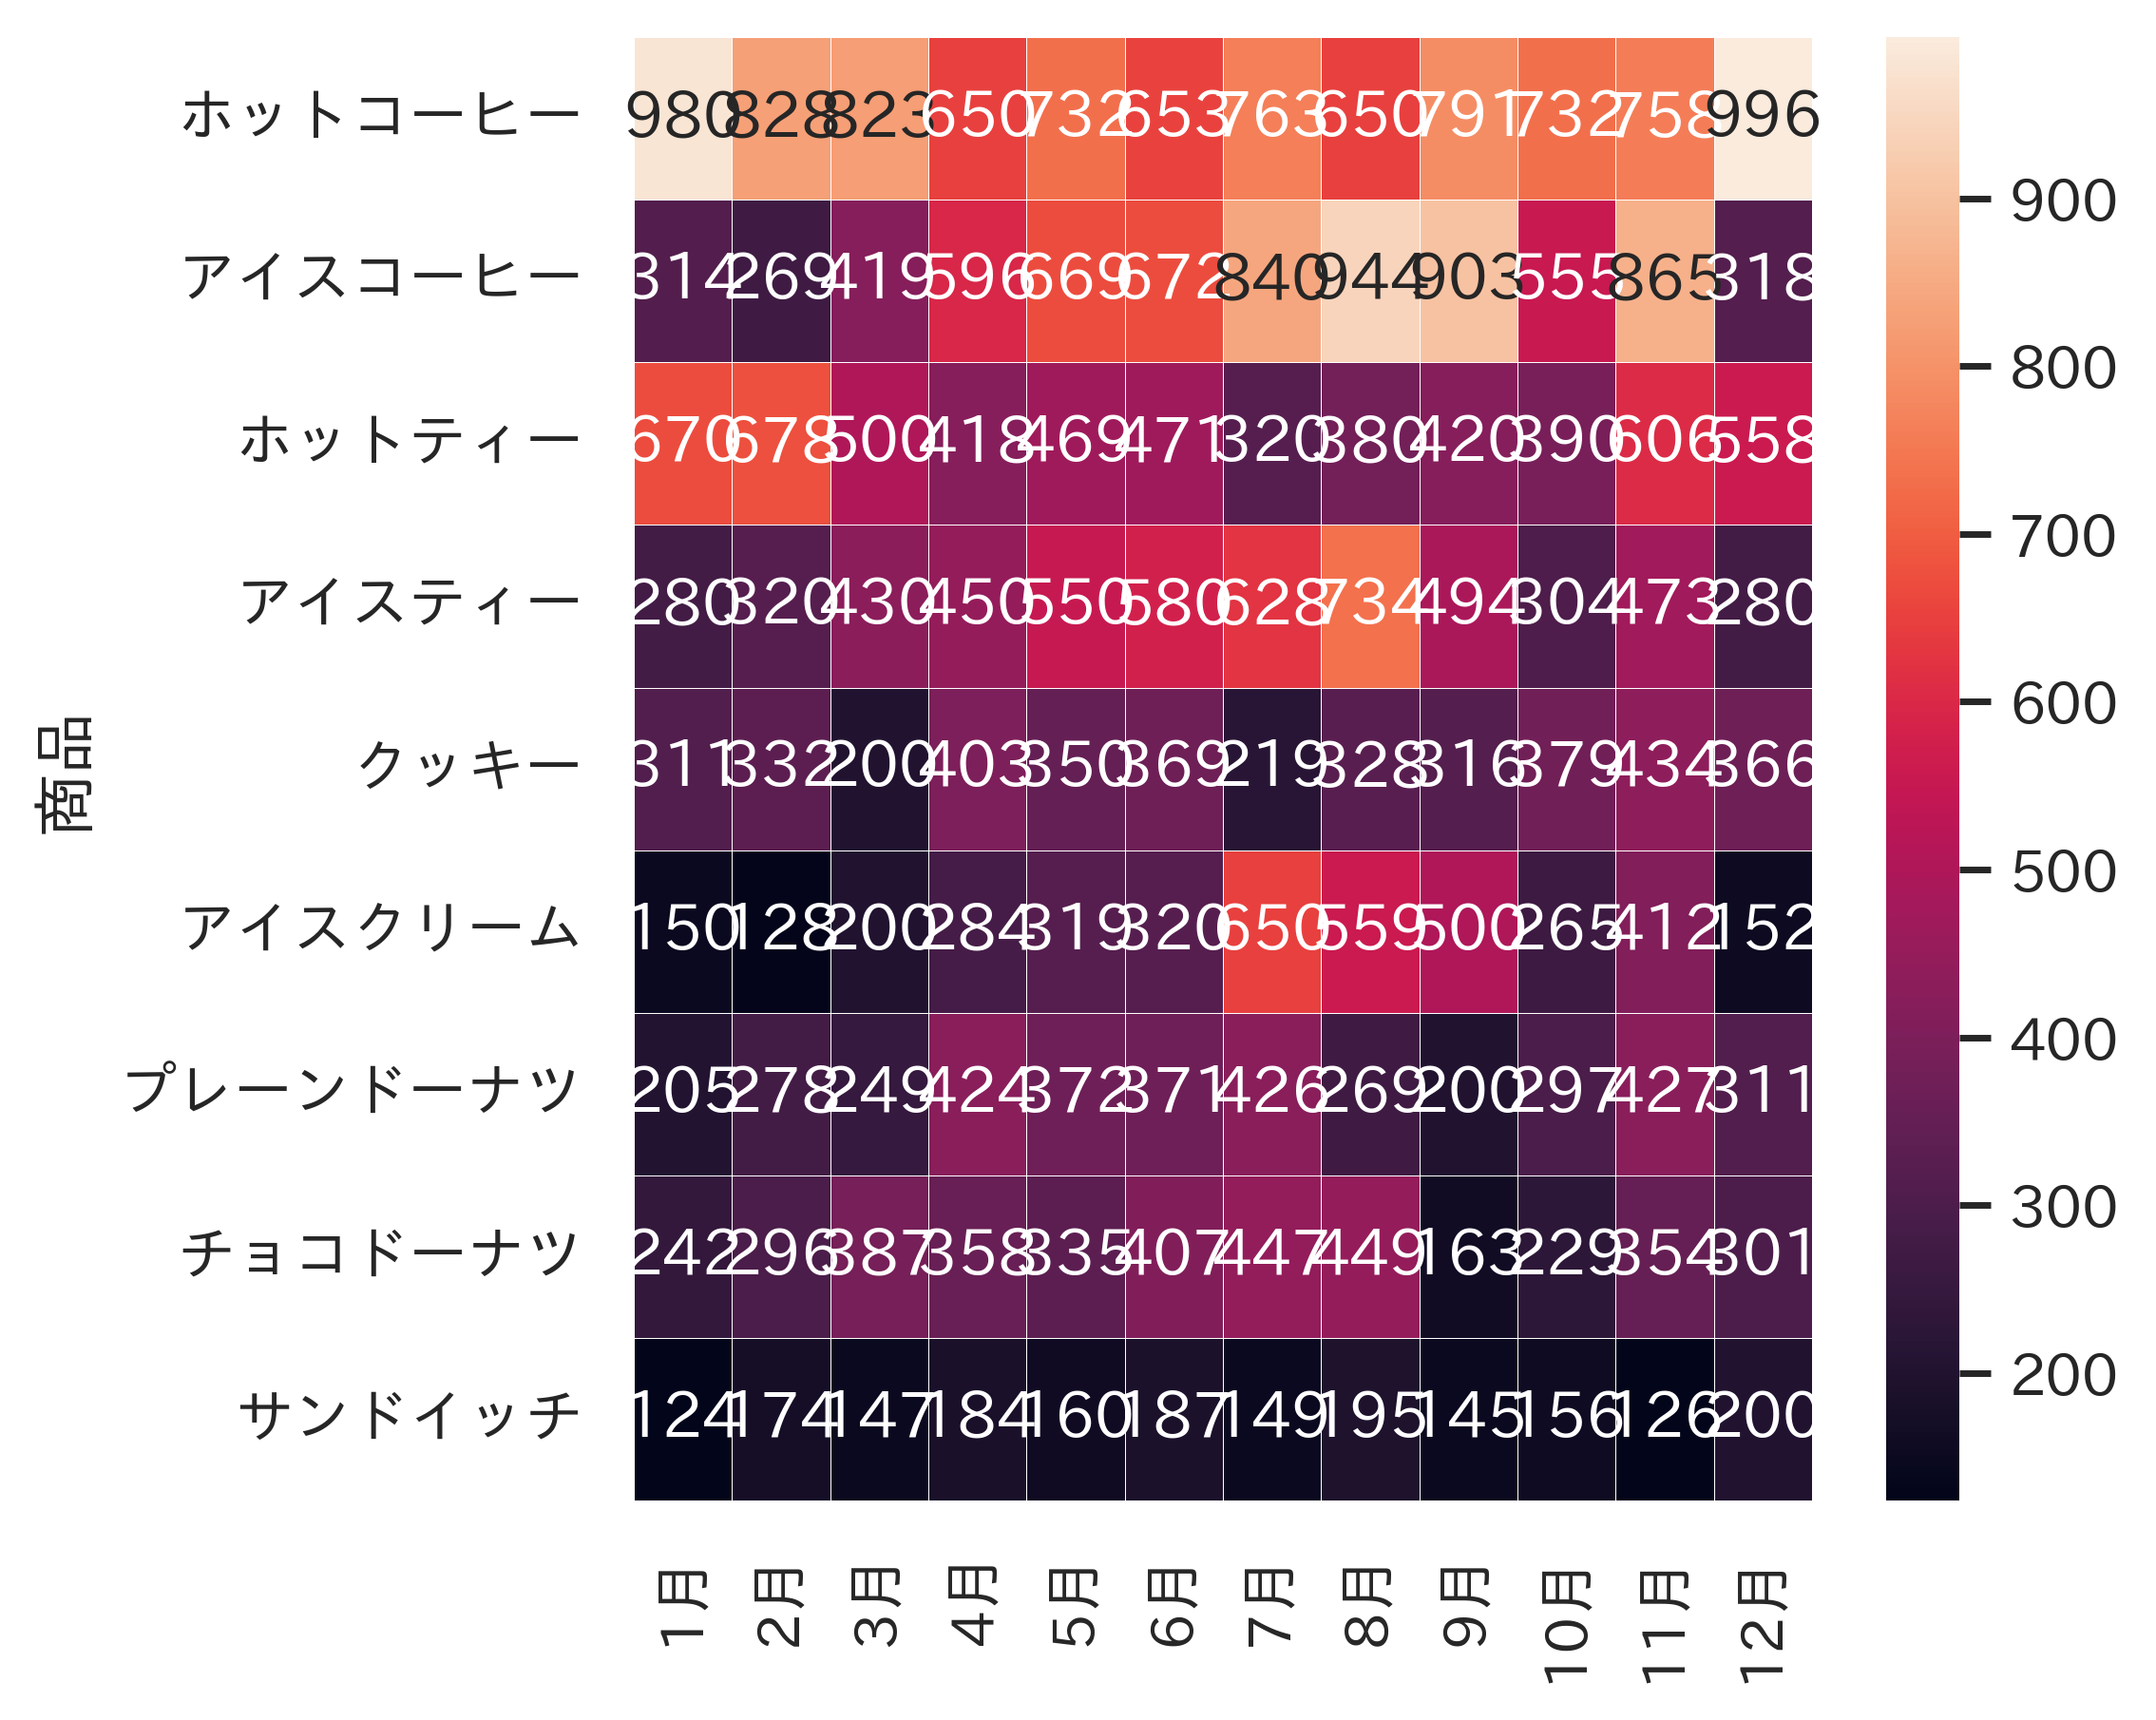

In [31]:
# linewidths: 各セルを分割する線の幅
# annot=True: 各セルにデータ値を書き込む
# fmt: 注釈を追加するときに使用する文字列フォーマットコード

sns.heatmap(cafe, linewidths=0.1, annot=True, fmt="d")

list 5.71 ヒートマップの描画例3

<AxesSubplot: ylabel='商品'>

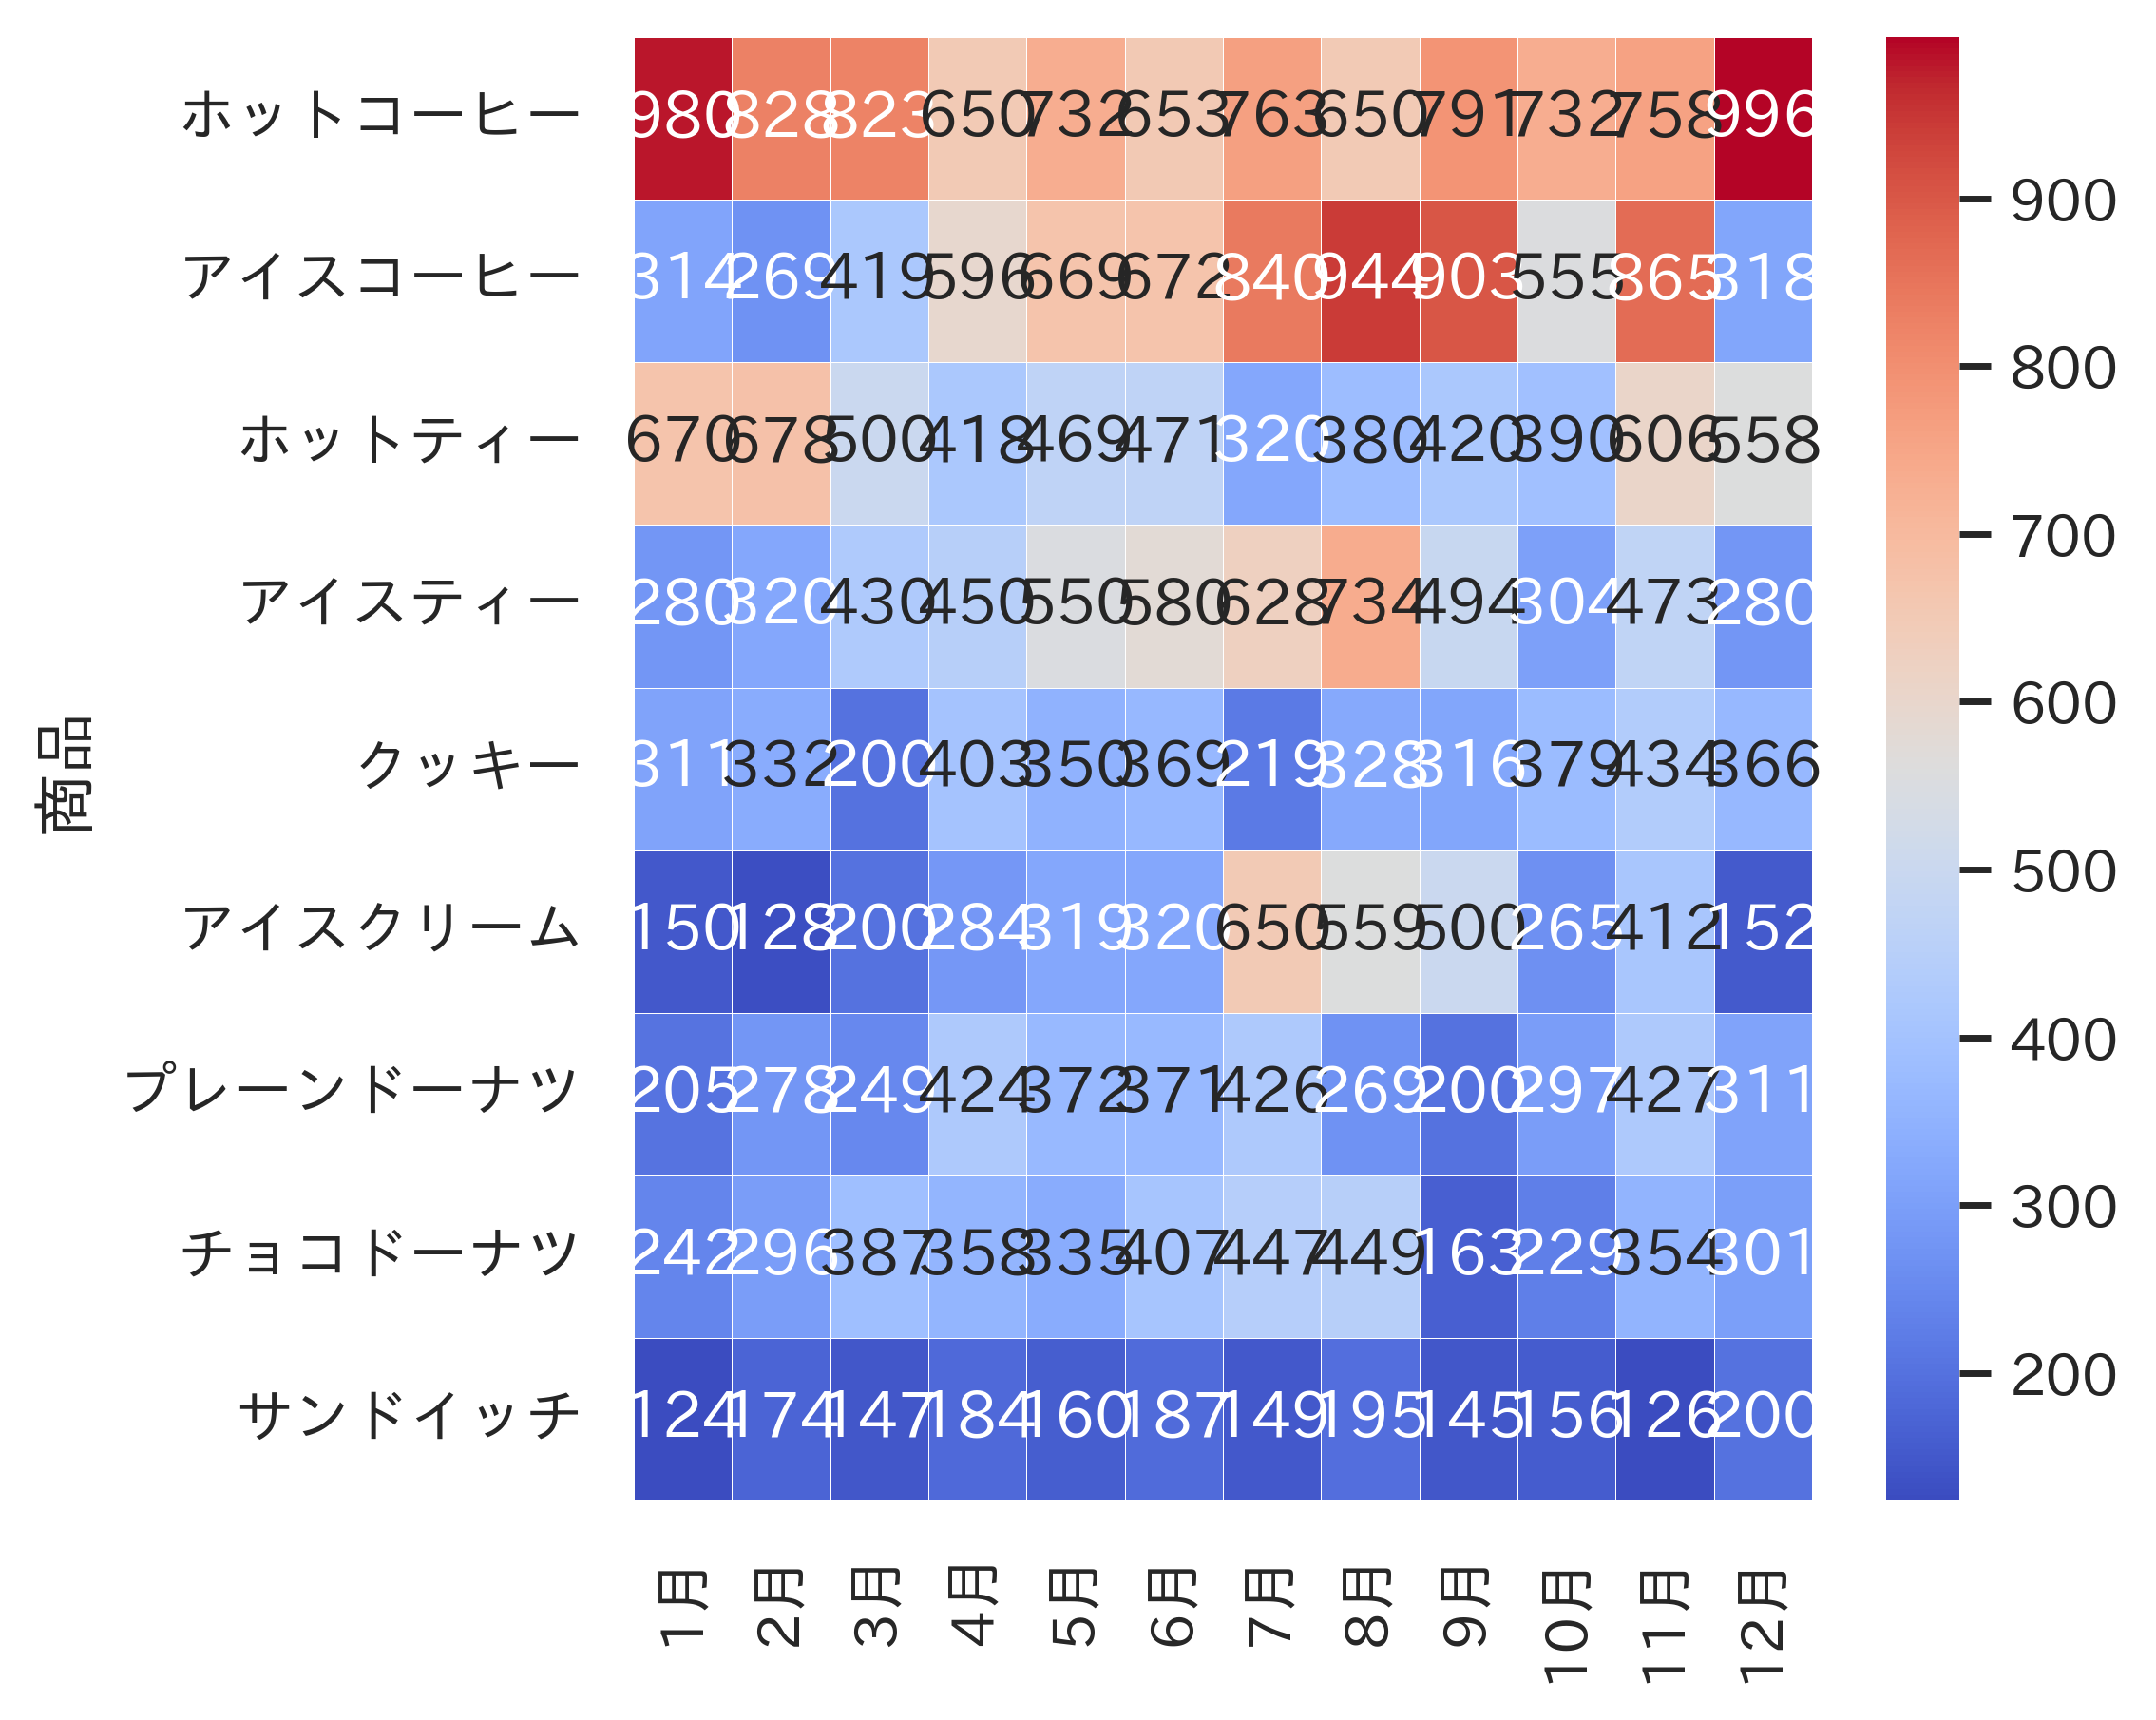

In [32]:
# cmap: matplotlib カラーマップ名またはオブジェクト、または色のリスト、オプション

sns.heatmap(cafe, linewidths=0.1, annot=True, fmt="d",cmap="coolwarm")

### Sec.16 ウォーターフォールチャート

- 2時点の変化や2者の差異を表現する
- [plotly/Waterfall Charts in Python](https://plotly.com/python/waterfall-charts/)

list 5.72 ウォーターフォールチャートの描画例

In [33]:
fig = go.Figure(go.Waterfall(
    # 絶対値か差分を指定する
    measure=["absolute", "relative", "relative", "relative", "relative", "total"],
    # 項目の定義
    x=["前月末残", "バイト代", "給料", "変動費", "固定費", "今月末残"],
    # ラベル位置の定義
    textposition= "outside",
    text=["30", "+10", "+50", "-32", "-10", "48"],
    # 数値の定義
    y=[30, 10, 50, -32, -10, 0],
    connector={"line": {"color": "rgb(0, 0, 0)"}}
))
fig.update_layout(title="私の口座の動き", showlegend=True)
fig.show()

### Sec.17 ツリーマップ

- 面積でデータの大小関係を表現する
- [squarify](https://github.com/laserson/squarify)

In [34]:
# plotlyに含まれる2007年の人工情報を取得
pop_df = px.data.gapminder().query("year == 2007")
display(pop_df)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [35]:
# 人口を降順に並び替える
pop_df = pop_df.sort_values("pop", ascending=False)
display(pop_df)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
299,China,Asia,2007,72.961,1318683096,4959.114854,CHN,156
707,India,Asia,2007,64.698,1110396331,2452.210407,IND,356
1619,United States,Americas,2007,78.242,301139947,42951.653090,USA,840
719,Indonesia,Asia,2007,70.650,223547000,3540.651564,IDN,360
179,Brazil,Americas,2007,72.390,190010647,9065.800825,BRA,76
...,...,...,...,...,...,...,...,...
1019,Montenegro,Europe,2007,74.543,684736,9253.896111,MNE,499
491,Equatorial Guinea,Africa,2007,51.579,551201,12154.089750,GNQ,226
431,Djibouti,Africa,2007,54.791,496374,2082.481567,DJI,262
695,Iceland,Europe,2007,81.757,301931,36180.789190,ISL,352


list5.73 ツリーマップの描画例

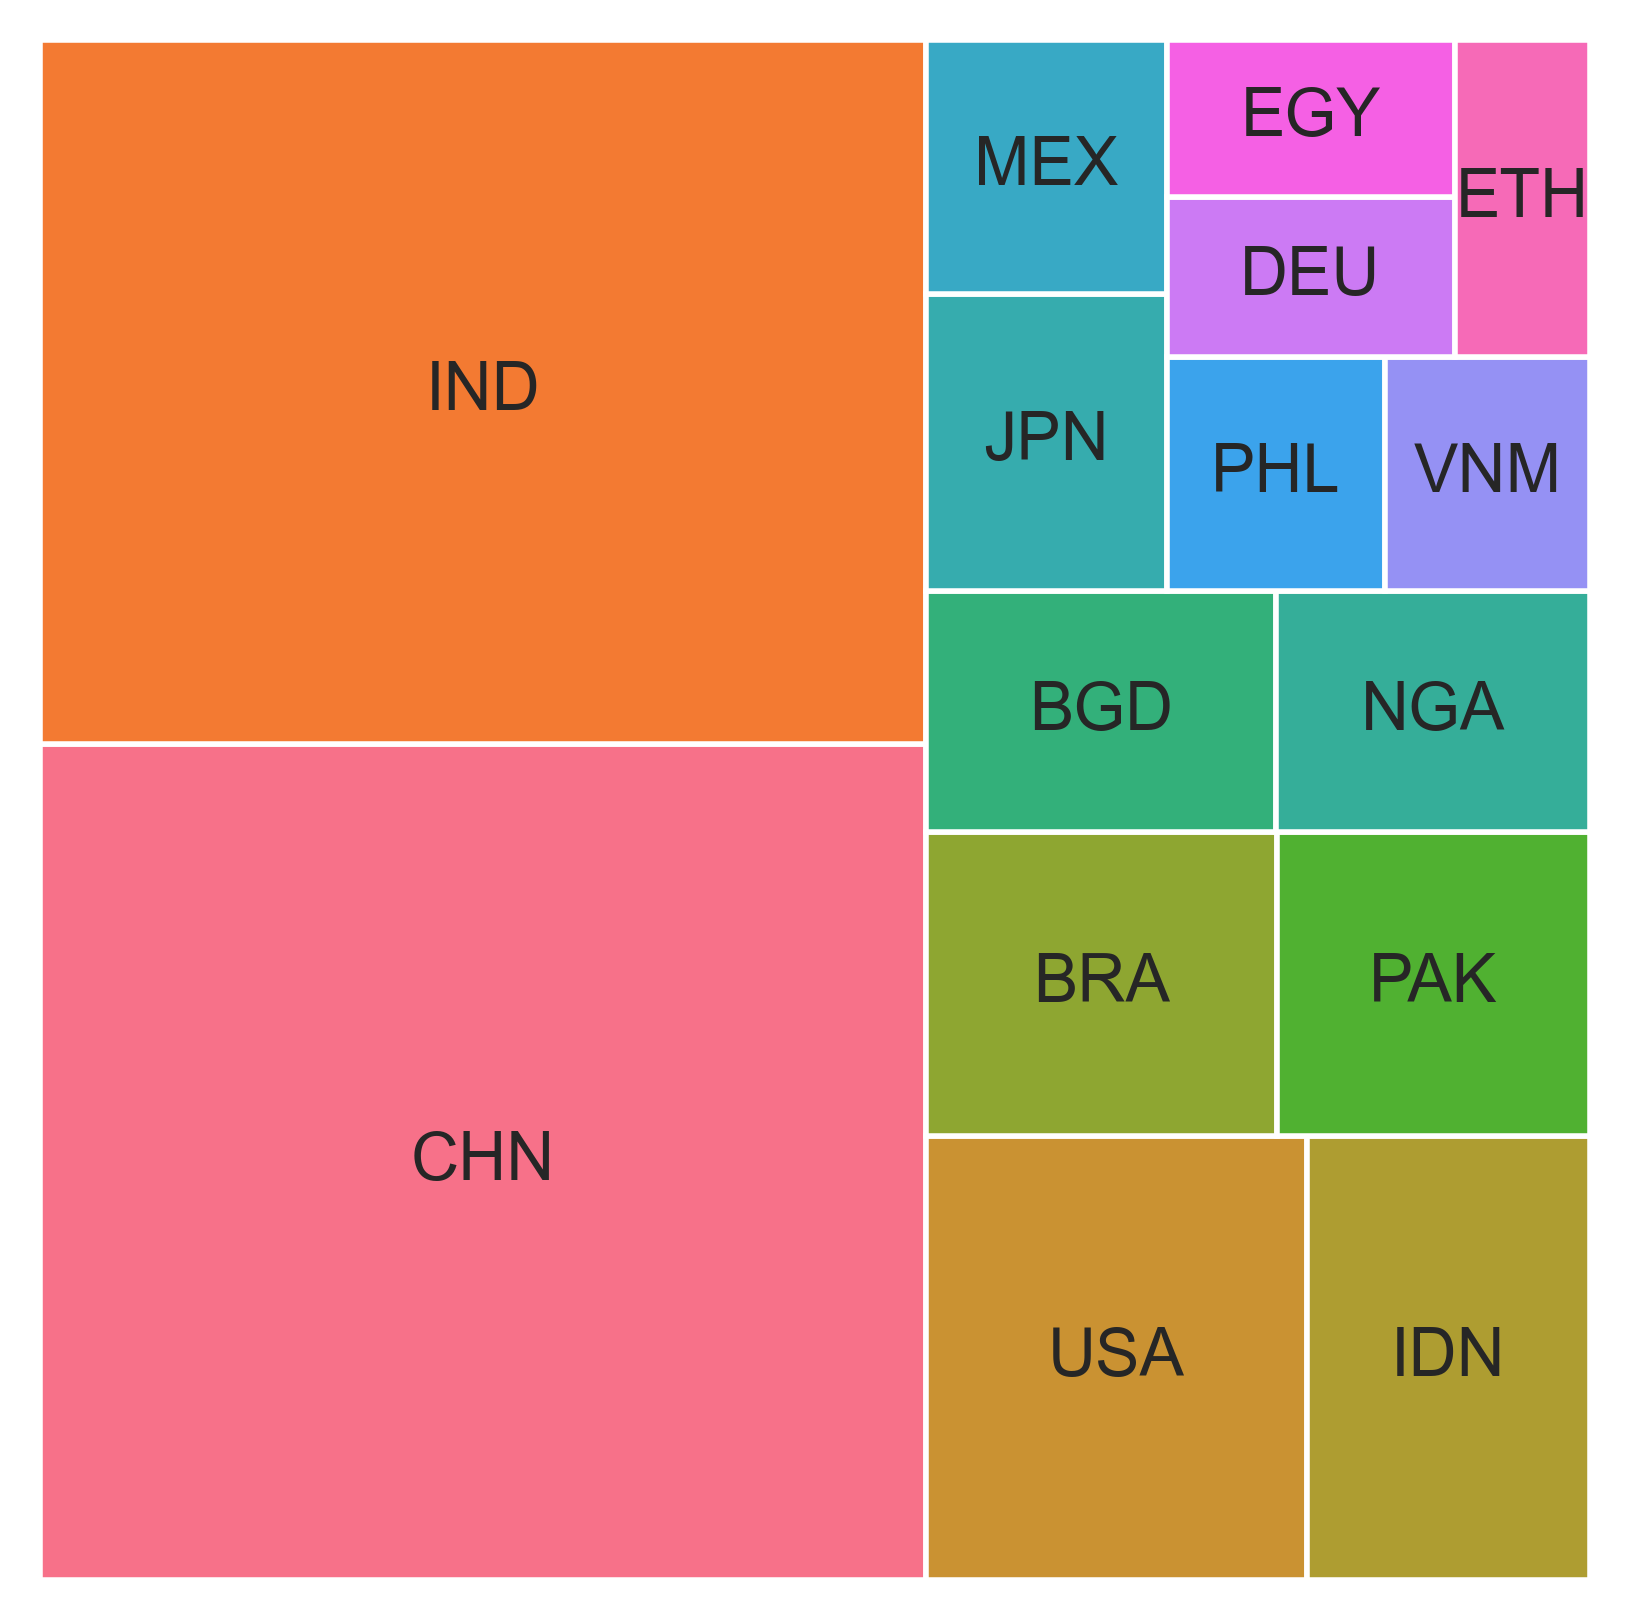

In [36]:
# 上位15件のみ取得
pop_df = pop_df.head(15)

# サイズ調整
sns.set(rc={
    "figure.figsize": (5, 5),
    "figure.dpi": 400
})
# ツリーマップの描画
squarify.plot(
    sizes=pop_df["pop"], label=pop_df["iso_alpha"],
    color=sns.color_palette("husl", n_colors=len(pop_df))
)
# 軸ラベルの除去
plt.axis("off")
plt.show()

### Sec.18 サンバーストチャート

- 階層構造で割合を表現する
- [plotly/Sunburst Charts in Python](https://plotly.com/python/sunburst-charts/)

list5.74 サンバースチャートの描画例

In [37]:
# データ定義
org = [
    {"name": "全社", "parent": "", "num": 50},
    {"name": "人事・総務部", "parent": "全社", "num": 10},
    {"name": "営業部", "parent": "全社", "num": 20},
    {"name": "第1営業室", "parent": "営業部", "num": 15},
    {"name": "第2営業室", "parent": "営業部", "num": 5},
    {"name": "開発部", "parent": "全社", "num": 20},
    {"name": "第1開発室", "parent": "開発部", "num": 10},
    {"name": "第2開発室", "parent": "開発部", "num": 7},
    {"name": "相談窓口", "parent": "開発部", "num": 3},
]

# グラフ定義
trace = go.Sunburst(
    labels=[record["name"] for record in org],
    parents=[record["parent"] for record in org],
    branchvalues="total",
    outsidetextfont={"size": 30, "color": "#82A9DA"}
)
# レイアウト定義
layout = go.Layout(margin=go.layout.Margin(t=0, l=0, r=0, b=0))
# 描画
plotly.offline.iplot(go.Figure([trace], layout))

### Sec.19 レーダーチャート

- 順序尺度を複数持つデータを表現する
- [plotly.express.line_polar](https://plotly.com/python-api-reference/generated/plotly.express.line_polar.html)
- [plotly/Polar Charts in Python](https://plotly.com/python/polar-chart/)

list5.75 1つのレーダーチャートの描画例

In [38]:
# データ定義
data = [
    {"label": "品質", "value": 5},
    {"label": "価格", "value": 4},
    {"label": "配達", "value": 2.7},
    {"label": "カスタマーサービス", "value": 3.4},
    {"label": "サイトの使いやすさ", "value": 4.3},
    {"label": "写真と実物の一致度", "value": 3.5},
]
df = pd.DataFrame({
    "label": [record["label"] for record in data],
    "value": [record["value"] for record in data]
})
display(df)

# グラフ定義
fig = px.line_polar(
    df, r="value", theta="label", line_close=True
)
# レイアウト定義
fig.update_traces(fill="toself")
# 描画
fig.show()

,label,value
0,品質,5.0
1,価格,4.0
2,配達,2.7
3,カスタマーサービス,3.4
4,サイトの使いやすさ,4.3
5,写真と実物の一致度,3.5


/Users/takeru/@LEARNING/Python/Introduction_to_Python_Data_Visualization_SE/venv/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#### 複数のレーダーチャートを重ねて描画する

list5.76 複数のレーダーチャートを重ねた描画例

In [39]:
# データ定義
data = [
    {
        "氏名": "顧客1",
        "品質": 5,
        "価格": 4,
        "配達": 2.7,
        "カスタマーサービス": 3.4,
        "サイトの使いやすさ": 4.3,
        "写真との一致度": 3.5
    },
    {
        "氏名": "顧客2",
        "品質": 4,
        "価格": 3,
        "配達": 4.5,
        "カスタマーサービス": 4.5,
        "サイトの使いやすさ": 1,
        "写真との一致度": 4.5
    }
]
df = pd.DataFrame(data).set_index("氏名")
display(df)

,品質,価格,配達,カスタマーサービス,サイトの使いやすさ,写真との一致度
氏名,,,,,,
顧客1,5,4,2.7,3.4,4.3,3.5
顧客2,4,3,4.5,4.5,1.0,4.5


In [40]:
df.stack()

氏名            
顧客1  品質           5.0
     価格           4.0
     配達           2.7
     カスタマーサービス    3.4
     サイトの使いやすさ    4.3
     写真との一致度      3.5
顧客2  品質           4.0
     価格           3.0
     配達           4.5
     カスタマーサービス    4.5
     サイトの使いやすさ    1.0
     写真との一致度      4.5
dtype: float64

In [41]:
df.stack().rename_axis(["氏名", "label"])

氏名   label    
顧客1  品質           5.0
     価格           4.0
     配達           2.7
     カスタマーサービス    3.4
     サイトの使いやすさ    4.3
     写真との一致度      3.5
顧客2  品質           4.0
     価格           3.0
     配達           4.5
     カスタマーサービス    4.5
     サイトの使いやすさ    1.0
     写真との一致度      4.5
dtype: float64

In [42]:
df.stack().rename_axis(["氏名", "label"]).reset_index()

,氏名,label,0
0,顧客1,品質,5.0
1,顧客1,価格,4.0
2,顧客1,配達,2.7
3,顧客1,カスタマーサービス,3.4
4,顧客1,サイトの使いやすさ,4.3
5,顧客1,写真との一致度,3.5
6,顧客2,品質,4.0
7,顧客2,価格,3.0
8,顧客2,配達,4.5
9,顧客2,カスタマーサービス,4.5


In [43]:
df.stack().rename_axis(["氏名", "label"]).reset_index().rename(columns={0: "value"})

,氏名,label,value
0,顧客1,品質,5.0
1,顧客1,価格,4.0
2,顧客1,配達,2.7
3,顧客1,カスタマーサービス,3.4
4,顧客1,サイトの使いやすさ,4.3
5,顧客1,写真との一致度,3.5
6,顧客2,品質,4.0
7,顧客2,価格,3.0
8,顧客2,配達,4.5
9,顧客2,カスタマーサービス,4.5


In [44]:
df = df.stack().rename_axis(["氏名", "label"]).reset_index().rename(columns={0: "value"})

In [45]:
fig = px.line_polar(
    df, r="value", theta="label", color="氏名", line_close=True
)
fig.show()

/Users/takeru/@LEARNING/Python/Introduction_to_Python_Data_Visualization_SE/venv/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/takeru/@LEARNING/Python/Introduction_to_Python_Data_Visualization_SE/venv/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

